# San Francisco Incident Visualisations

Loading required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import dateutil

# # load and explore data

In [3]:
sfc=pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

In [4]:
sfc.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [5]:
sfc.describe()

,IncidntNum,X,Y,PdId
count,2.899300e+04,28993.000000,28993.000000,2.899300e+04
mean,1.420173e+08,-122.421961,37.768911,1.420173e+13
std,1.853367e+07,0.025313,0.023604,1.853367e+12
min,1.028438e+07,-122.513642,37.708083,1.028439e+12
25%,1.405456e+08,-122.432224,37.756486,1.405456e+13
50%,1.406320e+08,-122.415633,37.775421,1.406320e+13
75%,1.407197e+08,-122.406521,37.785094,1.407197e+13
max,9.903674e+08,-122.365565,37.817315,9.903674e+13


# # Add some attributes

since the volume of the data is relatively low, first I tried to explore it on excel. I decied to add two new attributes, day of week and Hour. and also add cnt = 1 to count filtered records. Below script adds new attributes.

In [6]:
sfc['DateTime']=sfc['Date'].map(str)+' '+sfc['Time'].map(str)
sfc['DateTime'] = sfc['DateTime'].apply(dateutil.parser.parse)
sfc['DayofWeek'] = sfc['DateTime'].dt.dayofweek
sfc['Hour'] = sfc['DateTime'].dt.hour
sfc['cnt']=1

# # visualisations

firts, try to understand counts by single factor

first finding, there is a trend with incident hour and number of incedents

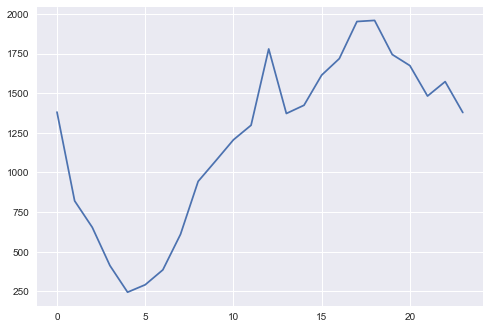

In [7]:
pdata = sfc.groupby(['Hour'],as_index=False)['cnt'].sum() 
plt.plot(pdata['Hour'],pdata['cnt'])
plt.show()

second, most common crime is Larcency/theft

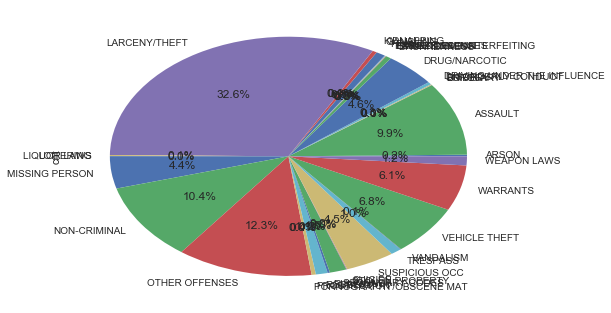

In [8]:
pdata = sfc.pivot_table(values='cnt', index=[],columns='Category', aggfunc=sum)
pdata.plot.pie(autopct='%1.1f%%')
plt.show()

third, southern is the district with highest number of incidensts 

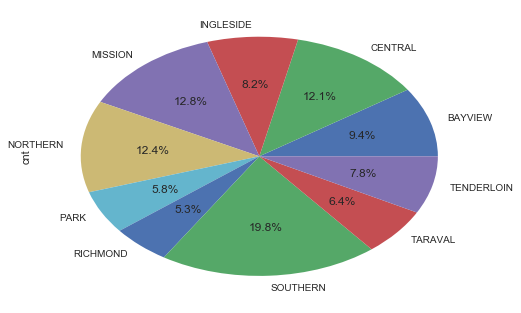

In [9]:
pdata = sfc.pivot_table(values='cnt', index=[],columns='PdDistrict', aggfunc=sum)
pdata.plot.pie(autopct='%1.1f%%')
plt.show()

Second, I have investigated hour and category factors. 
finding is Larcency/Theft, which is the most common category, is causing the number of incident trend by hour

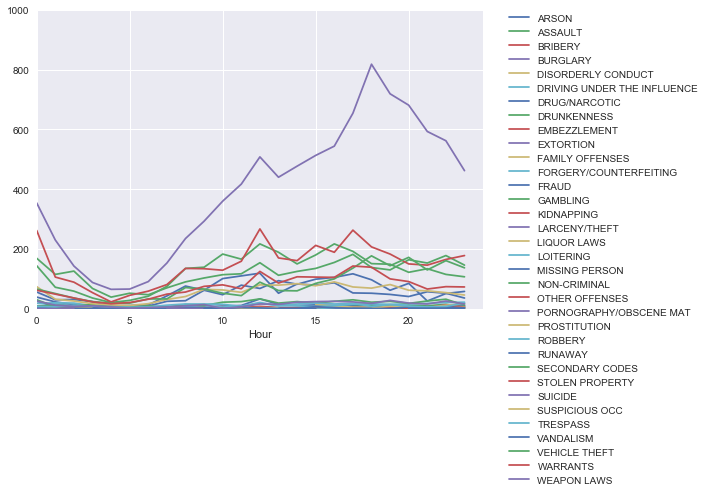

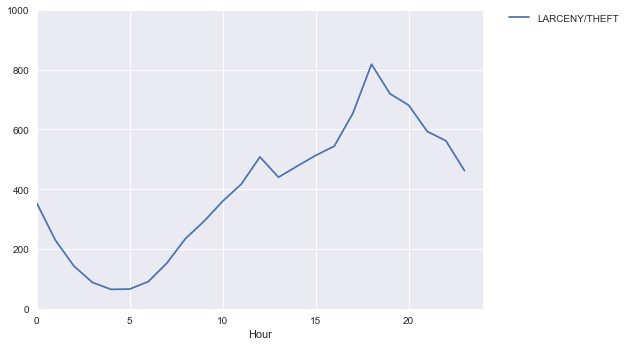

In [10]:
hm_data = sfc.pivot_table(values='cnt', index=['Hour'],columns='Category', aggfunc=sum)
hm_data.plot(kind='line')
#plt.subplots(figsize=(20,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 24, 0, 1000])
plt.show()

hm_data['LARCENY/THEFT'].plot(kind='line')
#plt.subplots(figsize=(20,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 24, 0, 1000])
plt.show()

then investigated Hour trend for larcency/Crime category with district detail and seen that other then Central, Southern and Northern districts was notthat obvious. 

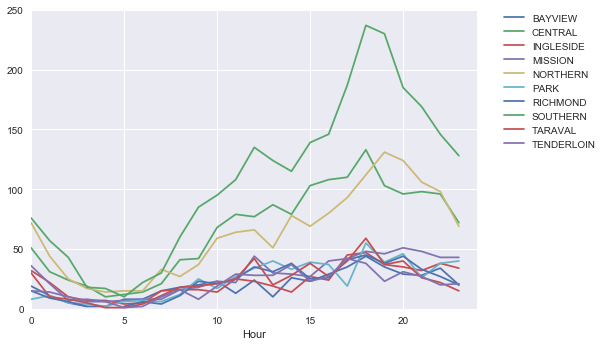

In [11]:
hm_data = sfc[sfc['Category'] == 'LARCENY/THEFT'].pivot_table(values='cnt', index=['Hour'],columns='PdDistrict', aggfunc=sum)
hm_data.plot(kind='line')
#plt.subplots(figsize=(20,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 24, 0, 250])
plt.show()

lastly I have investigated status of incidents and seen majority of them not solved yet.

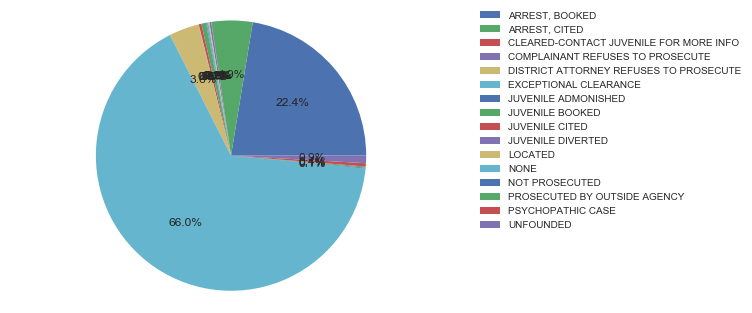

In [12]:
res_data = sfc.groupby('Resolution',as_index=False)['cnt'].sum()
plt.pie(res_data['cnt'], autopct='%1.1f%%')
plt.axis('equal')
plt.legend(res_data['Resolution'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

checked category resolution relation, Larcency/theft and vehicle theft seems to have the highest unresolved ratios. I ve checked the ratio for Larcency and %94,4 has the resolution code none.

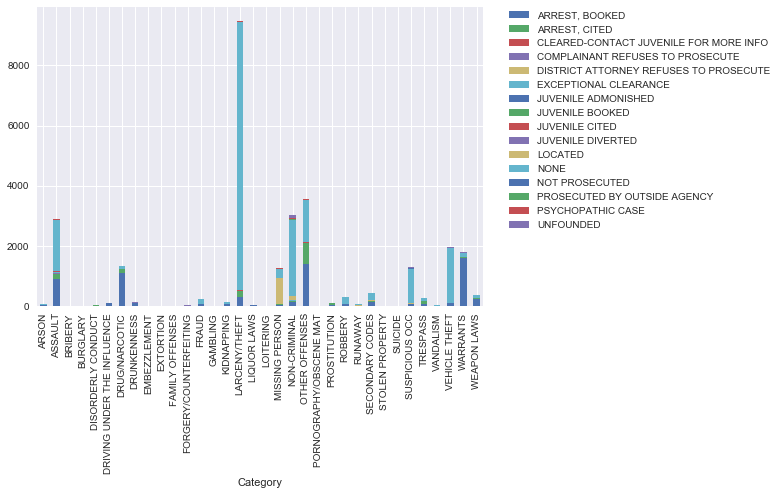

In [13]:
res_data = sfc.pivot_table(values='cnt', index=['Category'],columns='Resolution', aggfunc=sum)
res_data.plot.bar(stacked=True)
#plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

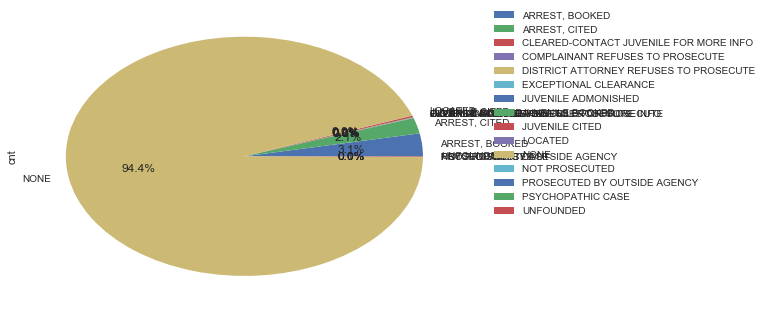

In [16]:
res_data = sfc[sfc['Category'] == 'LARCENY/THEFT'].pivot_table(values='cnt', index=[],columns='Resolution', aggfunc=sum)
res_data.plot.pie( autopct='%1.1f%%')
#plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In summary, Larcency/theft is the most common incident category and has the lowest resolution ratio. there seems to be a trend of incidents by Hour but it is also caused by the Larcency/theft category